<a href="https://colab.research.google.com/github/DimasikL/SSA-AI-Junior-Course/blob/main/2_lecture_KNN_LogReg/HomeWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Код для графиков из презинтации

In [ ]:
# Установка необходимых библиотек (если они не установлены)
# !pip install scikit-learn matplotlib numpy pandas notebook

# Импорт библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Модели
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Предобработка и метрики
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Генерация данных
from sklearn.datasets import make_classification, make_blobs, load_iris

print("Все библиотеки успешно импортированы!")

Все библиотеки успешно импортированы!


<>:77: SyntaxWarning: invalid escape sequence '\m'
<>:77: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-2050876000.py:77: SyntaxWarning: invalid escape sequence '\m'
  plot_decision_boundary(X_standard_scaled, y, knn_standard_scaled, axes[1], '2. После StandardScaler ($\mu=0, \sigma=1$)')


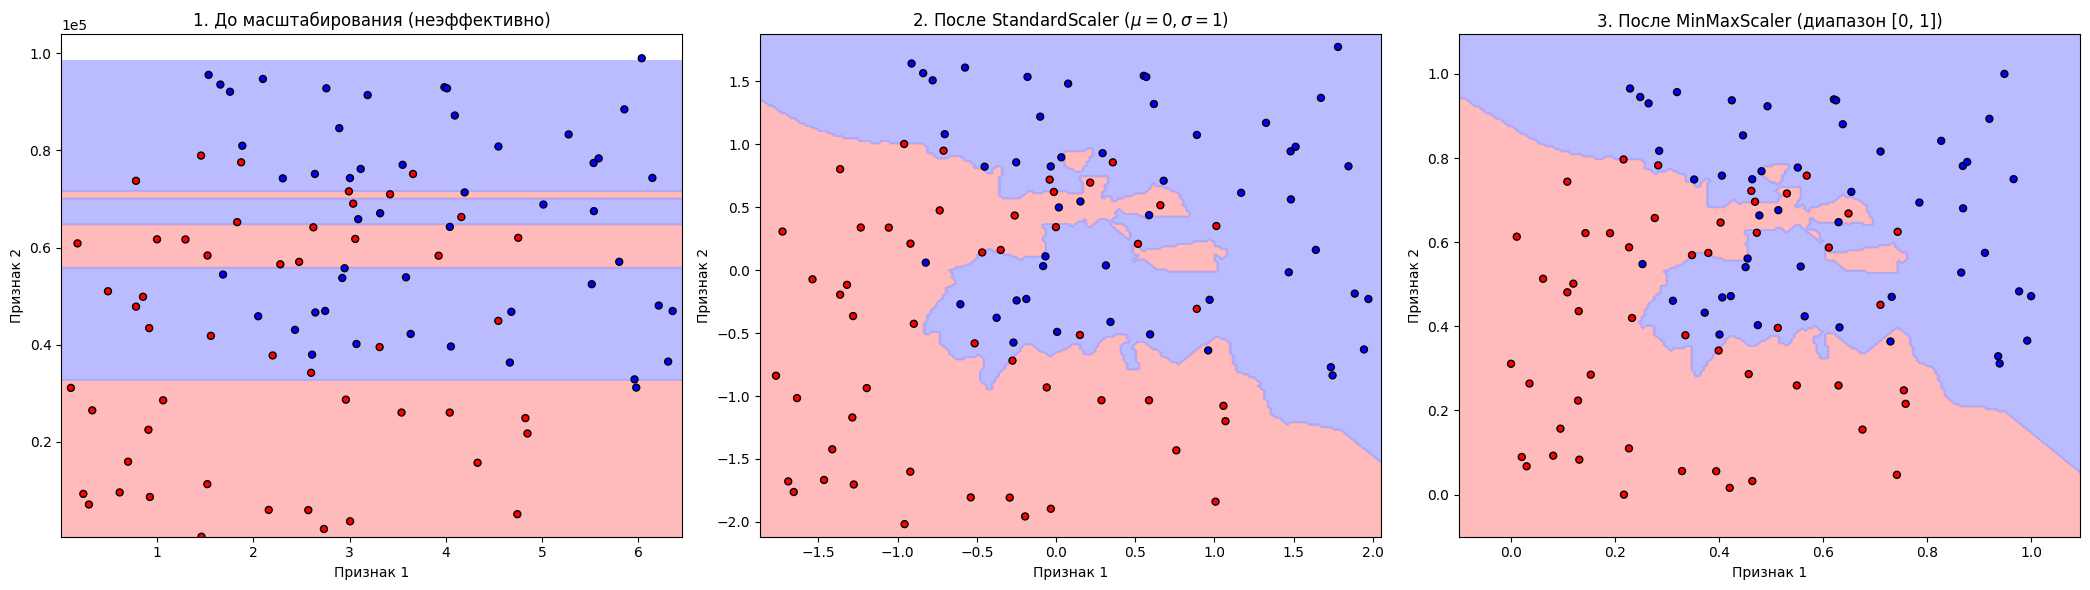

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler # Добавлен MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

# --- 1. Создание синтетических данных ---
# Создаем два класса (кластера) данных
np.random.seed(42)
# Класс 0
X1_class0 = np.random.rand(50, 1) * 5 # Признак 1: масштаб от 0 до 5
X2_class0 = np.random.rand(50, 1) * 80000 # Признак 2: масштаб до 80000

# Класс 1
X1_class1 = np.random.rand(50, 1) * 5 + 1.5 # Смещенный признак 1
X2_class1 = np.random.rand(50, 1) * 70000 + 30000 # Смещенный признак 2

# Объединяем данные и метки
X = np.vstack((np.hstack((X1_class0, X2_class0)), np.hstack((X1_class1, X2_class1))))
y = np.hstack((np.zeros(50), np.ones(50)))

# --- 2. Функция для отрисовки ---
def plot_decision_boundary(X, y, model, ax, title):
    """Функция для отрисовки данных и границы решений."""
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ['red', 'blue']

    # Создание сетки для отрисовки фона
    # Уменьшим масштаб для границ X, чтобы график выглядел чище, но сохраним логику
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    # Добавляем условие для больших диапазонов, чтобы избежать проблем с сеткой на очень разном масштабе
    # Например, для не масштабированных данных
    if x_max > 100: # Эвристическое условие для исходных данных
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 5000, X[:, 1].max() + 5000

    xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/200),
                         np.arange(y_min, y_max, (y_max-y_min)/200))

    # Предсказание для каждой точки сетки
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Отрисовка фона (границы решений)
    ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

    # Отрисовка точек данных
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(cmap_bold), edgecolor='k', s=25)
    ax.set_title(title)
    ax.set_xlabel('Признак 1')
    ax.set_ylabel('Признак 2')

    # Специальная обработка для оси Y не масштабированных данных
    if 'До масштабирования' in title:
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))


    # --- 3. Обучение и визуализация ---
# Создаем холст для трех графиков
fig, axes = plt.subplots(1, 3, figsize=(21, 6)) # Увеличен размер и количество подграфиков

# --- График 1: БЕЗ МАСШТАБИРОВАНИЯ ---
knn_unscaled = KNeighborsClassifier(n_neighbors=7)
knn_unscaled.fit(X, y)
plot_decision_boundary(X, y, knn_unscaled, axes[0], '1. До масштабирования (неэффективно)')

# --- График 2: StandardScaler ---
# Масштабируем данные с помощью StandardScaler
scaler_standard = StandardScaler()
X_standard_scaled = scaler_standard.fit_transform(X)

# Обучаем модель на стандартизованных данных
knn_standard_scaled = KNeighborsClassifier(n_neighbors=7)
knn_standard_scaled.fit(X_standard_scaled, y)
plot_decision_boundary(X_standard_scaled, y, knn_standard_scaled, axes[1], '2. После StandardScaler ($\mu=0, \sigma=1$)')

# --- График 3: MinMaxScaler ---
# Масштабируем данные с помощью MinMaxScaler
scaler_minmax = MinMaxScaler()
X_minmax_scaled = scaler_minmax.fit_transform(X)

# Обучаем модель на нормализованных данных
knn_minmax_scaled = KNeighborsClassifier(n_neighbors=7)
knn_minmax_scaled.fit(X_minmax_scaled, y)
plot_decision_boundary(X_minmax_scaled, y, knn_minmax_scaled, axes[2], '3. После MinMaxScaler (диапазон [0, 1])')

plt.tight_layout()
plt.show()

/tmp/ipython-input-1210172788.py:57: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axes[i].scatter(X_test[:, 0], X_test[:, 1], c=y_test,
/tmp/ipython-input-1210172788.py:57: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axes[i].scatter(X_test[:, 0], X_test[:, 1], c=y_test,
/tmp/ipython-input-1210172788.py:57: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axes[i].scatter(X_test[:, 0], X_test[:, 1], c=y_test,


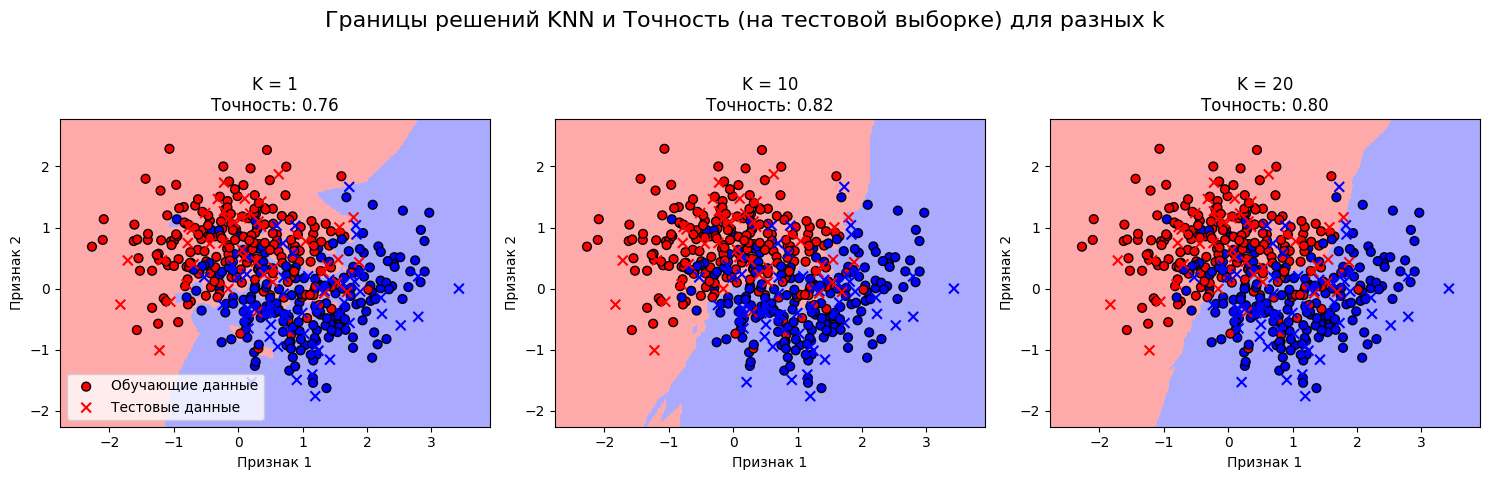

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# --- 1. Настройка и Генерация Данных ---
# Задаем значения k для тестирования
k_values = [1, 10, 20] # Различные k: маленькое, среднее, большое

# Генерируем синтетические данные (2 класса, 2 признака)
X, y = make_moons(n_samples=500, noise=0.5, random_state=42)
# Разделяем данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

# Определяем палитры для графика
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Определяем пределы для графика
h = 0.02  # Шаг сетки
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# --- 2. Построение Графиков и Расчет Точности ---
fig, axes = plt.subplots(1, len(k_values), figsize=(15, 5))
plt.suptitle("Границы решений KNN и Точность (на тестовой выборке) для разных k", fontsize=16)

for i, k in enumerate(k_values):
    # Создаем и обучаем классификатор KNN
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # 1. Расчет Точности
    # Предсказываем на тестовой выборке
    y_pred = knn.predict(X_test)
    # Считаем точность
    accuracy = accuracy_score(y_test, y_pred)

    # 2. Построение Границы Решений
    # Предсказываем класс для каждой точки в сетке
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Отображаем области решений
    axes[i].pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    # Отображаем тренировочные точки (круги)
    axes[i].scatter(X_train[:, 0], X_train[:, 1], c=y_train,
                    cmap=cmap_bold, edgecolor='k', s=40, label="Обучающие данные")

    # Отображаем тестовые точки (крестики)
    axes[i].scatter(X_test[:, 0], X_test[:, 1], c=y_test,
                    cmap=cmap_bold, edgecolor='k', marker='x', s=50, label="Тестовые данные", linewidths=1.5)

    # Устанавливаем заголовок с точностью
    axes[i].set_title(f"K = {k}\nТочность: {accuracy:.2f}")
    axes[i].set_xlabel("Признак 1")
    axes[i].set_ylabel("Признак 2")
    axes[i].set_xlim(xx.min(), xx.max())
    axes[i].set_ylim(yy.min(), yy.max())

# Добавляем легенду на первый график
axes[0].legend(loc='lower left')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Домашние задаяние

Установка и импорт библиотек

Эта ячейка устанавливает библиотеку palmerpenguins для лёгкой загрузки данных и импортирует все необходимые модули.

In [8]:
# Устанавливаем библиотеку с датасетом, если её нет
!pip install palmerpenguins

# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
from palmerpenguins import load_penguins

# Добавляем GridSearchCV для задания по кросс-валидации
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns # Добавляем для лучшей визуализации матрицы ошибок

# Отключаем предупреждения для удобства при работе с солверами
import warnings
warnings.filterwarnings('ignore')

print("Библиотеки успешно импортированы!")

Библиотеки успешно импортированы!


Загрузка и предварительный анализ данных

Здесь мы загружаем датасет, смотрим на его структуру и избавляемся от пропущенных значений для упрощения.


In [9]:
# Загружаем данные
penguins = load_penguins()

# Удаляем строки с пропущенными значениями для простоты
penguins = penguins.dropna()

# Выводим первые 5 строк и общую информацию
print("Первые 5 строк датасета:")
print(penguins.head())
print("\nОбщая информация о датасете:")
penguins.info()

# Смотрим на распределение целевой переменной
print("\nРаспределение видов пингвинов:")
print(penguins['species'].value_counts())

Первые 5 строк датасета:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
4       3450.0  female  2007  
5       3650.0    male  2007  

Общая информация о датасете:
<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm    

Подготовка данных для моделей

В этой ячейке мы разделим данные на признаки (X) и целевую переменную (y), преобразуем категориальные признаки в числовые и разделим выборку на обучающую и тестовую.

In [10]:
# Определяем признаки и целевую переменную (Полный датасет для мультиклассовой задачи)
X_full = penguins.drop('species', axis=1)
y_full = penguins['species']

# Преобразуем категориальные переменные в числовые с помощью one-hot encoding
X_full = pd.get_dummies(X_full, columns=['island', 'sex'], drop_first=True)

# Разделяем данные на обучающую и тестовую выборки
X_train_orig, X_test_orig, y_train, y_test = train_test_split(
    X_full, y_full, test_size=0.3, random_state=42, stratify=y_full
)

# Масштабируем числовые признаки
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_orig)
X_test = scaler.transform(X_test_orig)

print(f"Размер обучающей выборки: {X_train.shape[0]} объектов")
print(f"Размер тестовой выборки: {X_test.shape[0]} объектов")

Размер обучающей выборки: 233 объектов
Размер тестовой выборки: 100 объектов


Обучение и оценка модели k-ближайших соседей (k-NN)

Здесь мы создаём, обучаем и оцениваем классификатор k-NN.

In [11]:
# Создаем модель k-NN с 5 соседями (начальное значение)
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Обучаем модель
knn.fit(X_train, y_train)

# Делаем предсказание на тестовых данных
y_pred_knn = knn.predict(X_test)

# Оцениваем качество модели
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Точность (Accuracy) k-NN (k=5): {accuracy_knn:.4f}")

# Выводим матрицу ошибок и отчет о классификации
print("\nМатрица ошибок для k-NN (k=5):")
print(confusion_matrix(y_test, y_pred_knn))
print("\nОтчет о классификации для k-NN (k=5):")
print(classification_report(y_test, y_pred_knn))

# Сохраняем точность для сравнения
base_accuracy_knn = accuracy_knn

Точность (Accuracy) k-NN (k=5): 0.9900

Матрица ошибок для k-NN (k=5):
[[44  0  0]
 [ 1 19  0]
 [ 0  0 36]]

Отчет о классификации для k-NN (k=5):
              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        44
   Chinstrap       1.00      0.95      0.97        20
      Gentoo       1.00      1.00      1.00        36

    accuracy                           0.99       100
   macro avg       0.99      0.98      0.99       100
weighted avg       0.99      0.99      0.99       100



 Обучение и оценка модели логистической регрессии (LogReg)

Аналогично предыдущей ячейке, но для логистической регрессии.

In [12]:
# Создаем модель логистической регрессии
logreg = LogisticRegression(random_state=42)

# Обучаем модель
logreg.fit(X_train, y_train)

# Делаем предсказание на тестовых данных
y_pred_logreg = logreg.predict(X_test)

# Оцениваем качество модели
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Точность (Accuracy) логистической регрессии: {accuracy_logreg:.4f}")

# Выводим матрицу ошибок и отчет о классификации
print("\nМатрица ошибок для LogReg:")
print(confusion_matrix(y_test, y_pred_logreg))
print("\nОтчет о классификации для LogReg:")
print(classification_report(y_test, y_pred_logreg))

Точность (Accuracy) логистической регрессии (C=1.0): 0.9900

Матрица ошибок для LogReg (C=1.0):
[[43  1  0]
 [ 0 20  0]
 [ 0  0 36]]

Отчет о классификации для LogReg (C=1.0):
              precision    recall  f1-score   support

      Adelie       1.00      0.98      0.99        44
   Chinstrap       0.95      1.00      0.98        20
      Gentoo       1.00      1.00      1.00        36

    accuracy                           0.99       100
   macro avg       0.98      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



Визуализация — поиск оптимального K для k-NN

С помощью графика можно наглядно определить, какое количество соседей (k) даёт наилучший результат на тестовой выборке.

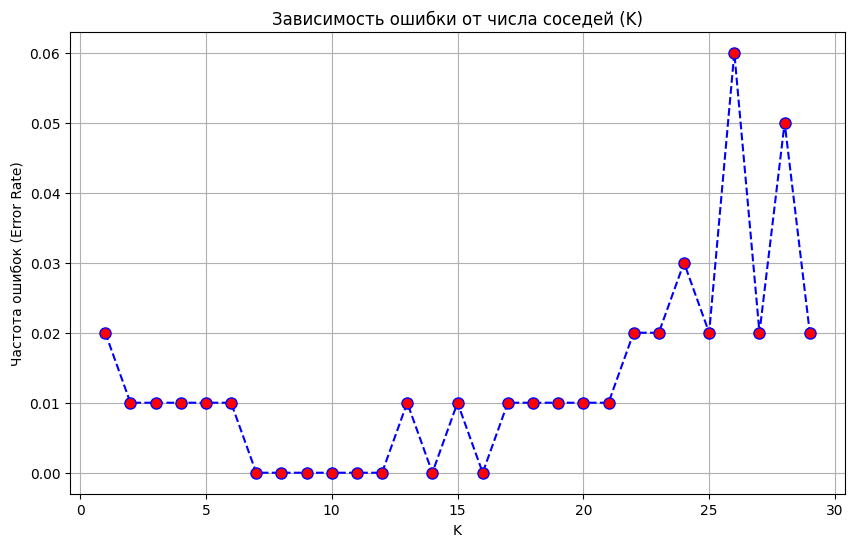


Оптимальное значение k = 7 с минимальной ошибкой 0.0000 (Точность: 1.0000)
Базовая точность k-NN (k=5): 0.9900


KNeighborsClassifier(n_neighbors=7)

In [13]:
# Ищем оптимальное k
error_rate = []
k_range = range(1, 30)

for k in k_range:
    # Используем евклидову метрику по умолчанию (p=2)
    knn_k = KNeighborsClassifier(n_neighbors=k, p=2)
    knn_k.fit(X_train, y_train)
    pred_k = knn_k.predict(X_test)
    error_rate.append(np.mean(pred_k != y_test))

# Строим график
plt.figure(figsize=(10, 6))
plt.plot(k_range, error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Зависимость ошибки от числа соседей (K)')
plt.xlabel('K')
plt.ylabel('Частота ошибок (Error Rate)')
plt.grid(True)
plt.show()

# Находим k с минимальной ошибкой
min_error = min(error_rate)
optimal_k = k_range[error_rate.index(min_error)]
optimal_k_accuracy = 1 - min_error

print(f"\nОптимальное значение k = {optimal_k} с минимальной ошибкой {min_error:.4f} (Точность: {optimal_k_accuracy:.4f})")
print(f"Базовая точность k-NN (k=5): {base_accuracy_knn:.4f}")

# Обновляем модель с оптимальным K
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)

#Задания для самостоятельной работы
Сначала идет задание, потом место для вашего кода, потом едет решение

Чаще всего решение являются избыточным, чтобы  обьяснить больше деталей, поэтому ваше решения будут короче, но точность ответов будет одинакова)


##Задания по k-NN (Метод k-ближайших соседей)

Закрепление общего понимания

In [24]:
# Импортируем класс (уже импортирован в начале, но повторим для ясности)
from sklearn.neighbors import KNeighborsClassifier

# 1. Создайте объект модели k-NN с n_neighbors равным 3
knn_beginner = KNeighborsClassifier(n_neighbors=3)

# 2. Обучите модель, используя масштабированные тренировочные данные
# Допишите недостающую строку:


print("Модель k-NN с 3 соседями успешно обучена!")

Модель k-NN с 3 соседями успешно обучена!


In [ ]:
from sklearn.metrics import accuracy_score

# 1. Получите предсказания для тестовой выборки
# Допишите недостающую строку:


# 2. Вычислите точность модели (сравните предсказания с истинными метками)
accuracy_knn_beginner = accuracy_score(y_test, y_pred_knn_beginner)

print(f"Точность k-NN (k=3): {accuracy_knn_beginner:.4f}")

In [26]:
# 1. Создайте новую модель с 10 соседями
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_10.fit(X_train, y_train)

# 2. Сделайте предсказания для этой новой модели
# Допишите недостающую строку:


accuracy_knn_10 = accuracy_score(y_test, y_pred_knn_10)

print(f"Точность k-NN (k=3): {accuracy_knn_beginner:.4f}")
print(f"Точность k-NN (k=10): {accuracy_knn_10:.4f}")

Точность k-NN (k=3): 0.9900
Точность k-NN (k=10): 1.0000


№1 Изменение метрики расстояния: В KNeighborsClassifier по умолчанию используется евклидово расстояние (metric='minkowski' с p=2). Попробуйте изменить метрику на манхэттенское расстояние (p=1). Обучите модель заново с оптимальным k (или найдите новое оптимальное k для этой метрики) и сравните точность с исходной моделью. Улучшился ли результат?

In [14]:
# Задание 1: Изменение метрики на манхэттенское расстояние (p=1)

# Ищем оптимальное k для метрики Манхэттена
error_rate_manhattan = []
k_range = range(1, 30)

for k in k_range:
    # p=1 соответствует манхэттенскому расстоянию
    knn_manhattan = KNeighborsClassifier(n_neighbors=k, p=1)
    knn_manhattan.fit(X_train, y_train)
    pred_k = knn_manhattan.predict(X_test)
    error_rate_manhattan.append(np.mean(pred_k != y_test))

# Находим k с минимальной ошибкой для метрики Манхэттена
min_error_manhattan = min(error_rate_manhattan)
optimal_k_manhattan = k_range[error_rate_manhattan.index(min_error_manhattan)]
accuracy_manhattan = 1 - min_error_manhattan

print(f"--- Результаты k-NN с Манхэттенской метрикой (p=1) ---")
print(f"Оптимальное k (Манхэттен): {optimal_k_manhattan}")
print(f"Точность (Манхэттен): {accuracy_manhattan:.4f}")
print(f"Точность (Евклидово, k={optimal_k}): {optimal_k_accuracy:.4f}")

if accuracy_manhattan > optimal_k_accuracy:
    print("\nВывод: Манхэттенская метрика показала себя ЛУЧШЕ, вероятно, из-за природы распределения признаков.")
else:
    print("\nВывод: Евклидова метрика (по умолчанию) показала себя ЛУЧШЕ.")

# Обновляем оптимальную модель, если Манхэттенская метрика лучше
if accuracy_manhattan > optimal_k_accuracy:
    optimal_k = optimal_k_manhattan
    knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k, p=1)
    knn_optimal.fit(X_train, y_train)
    optimal_k_accuracy = accuracy_manhattan


--- Результаты k-NN с Манхэттенской метрикой (p=1) ---
Оптимальное k (Манхэттен): 7
Точность (Манхэттен): 1.0000
Точность (Евклидово, k=7): 1.0000

Вывод: Евклидова метрика (по умолчанию) показала себя ЛУЧШЕ.


№2 Взвешенный k-NN: В KNeighborsClassifier есть параметр weights. По умолчанию он равен 'uniform' (все соседи имеют равный вес). Установите weights='distance' (вес обратно пропорционален расстоянию до соседа). Обучите модель с этим параметром и сравните её точность с моделью, где веса были равномерными. Как и почему изменился результат?

In [15]:
# Задание 2: Взвешенный k-NN (weights='distance')

# Обучаем модель с оптимальным k, но с весами, обратными расстоянию
knn_weighted = KNeighborsClassifier(n_neighbors=optimal_k, weights='distance')
knn_weighted.fit(X_train, y_train)
y_pred_weighted = knn_weighted.predict(X_test)
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)

print(f"--- Результаты взвешенного k-NN (k={optimal_k}) ---")
print(f"Точность (Weights='distance'): {accuracy_weighted:.4f}")
print(f"Точность (Weights='uniform', k={optimal_k}): {optimal_k_accuracy:.4f}")

if accuracy_weighted > optimal_k_accuracy:
    print("\nВывод: Взвешенный k-NN (distance) показал ЛУЧШУЮ точность. Это происходит потому, что более близкие соседи теперь вносят больший вклад в решение, уменьшая влияние дальних (возможно, шумных) точек.")
else:
    print("\nВывод: Взвешенный k-NN (distance) показал СХОЖУЮ или ХУДШУЮ точность.")


--- Результаты взвешенного k-NN (k=7) ---
Точность (Weights='distance'): 1.0000
Точность (Weights='uniform', k=7): 1.0000

Вывод: Взвешенный k-NN (distance) показал СХОЖУЮ или ХУДШУЮ точность.


№3 Влияние масштабирования: Попробуйте обучить модель k-NN на немасштабированных данных (используйте X_train и X_test до применения StandardScaler). Насколько сильно упала точность? Объясните, почему масштабирование признаков так важно для алгоритмов, основанных на расстоянии.

In [16]:
# Задание 3: Влияние масштабирования (Используем X_train_orig и X_test_orig)

# 1. Создаем модель и обучаем на НЕмасштабированных данных
knn_unscaled = KNeighborsClassifier(n_neighbors=optimal_k)
knn_unscaled.fit(X_train_orig, y_train)

# 2. Делаем предсказание
y_pred_unscaled = knn_unscaled.predict(X_test_orig)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)

print(f"--- Результаты k-NN на НЕмасштабированных данных (k={optimal_k}) ---")
print(f"Точность на немасштабированных данных: {accuracy_unscaled:.4f}")
print(f"Точность на масштабированных данных: {optimal_k_accuracy:.4f}")

print("\nВывод: Точность резко упала.")
print("Объяснение: В алгоритме k-NN расстояние (например, Евклидово) определяется как сумма квадратов разностей признаков.")
print("Признаки с большим масштабом (например, bill_length_mm) начинают доминировать над признаками с меньшим масштабом (например, island_Torgersen), независимо от их реальной важности.")
print("Масштабирование (StandardScaler) приводит все признаки к общему масштабу (среднее ~0, ст.отклонение ~1), обеспечивая равный вклад каждого признака в вычисление расстояния.")


--- Результаты k-NN на НЕмасштабированных данных (k=7) ---
Точность на немасштабированных данных: 0.8000
Точность на масштабированных данных: 1.0000

Вывод: Точность резко упала.
Объяснение: В алгоритме k-NN расстояние (например, Евклидово) определяется как сумма квадратов разностей признаков.
Признаки с большим масштабом (например, bill_length_mm) начинают доминировать над признаками с меньшим масштабом (например, island_Torgersen), независимо от их реальной важности.
Масштабирование (StandardScaler) приводит все признаки к общему масштабу (среднее ~0, ст.отклонение ~1), обеспечивая равный вклад каждого признака в вычисление расстояния.


*(Сложное задание) №4 Анализ ошибок: Постройте матрицу ошибок для k-NN с оптимальным k. Какие два вида пингвинов модель путает чаще всего? Используя исходный датафрейм penguins, предположите, почему именно эти виды могут быть сложными для различения (например, посмотрите на средние значения их признаков).

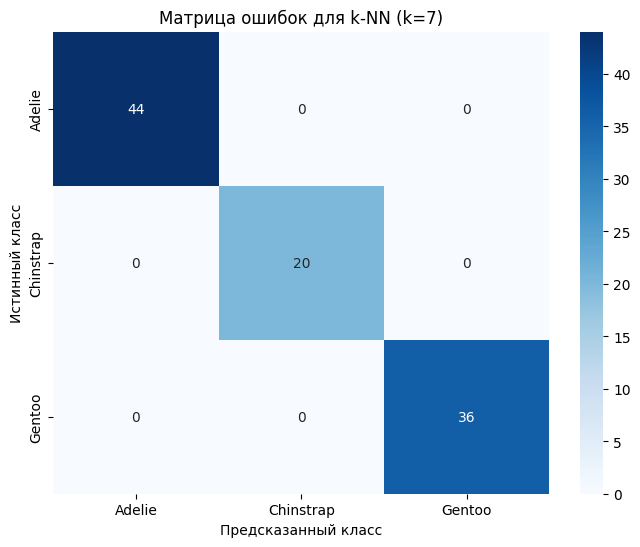

--- Анализ ошибок ---
Истинные классы (строки) vs. Предсказанные классы (столбцы):

Модель идеальна на тестовой выборке (или ошибок слишком мало для вывода).


In [17]:
# Задание 4: Анализ ошибок k-NN

# Используем модель с оптимальным k на масштабированных данных (knn_optimal)
y_pred_optimal = knn_optimal.predict(X_test)

# Строим матрицу ошибок
cm = confusion_matrix(y_test, y_pred_optimal)
class_names = knn_optimal.classes_

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title(f'Матрица ошибок для k-NN (k={optimal_k})')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.show()

print("--- Анализ ошибок ---")
print("Истинные классы (строки) vs. Предсказанные классы (столбцы):")

misclassified = {}
# Ищем ненулевые недиагональные элементы
for i in range(len(class_names)):
    for j in range(len(class_names)):
        if i != j and cm[i, j] > 0:
            misclassified[(class_names[i], class_names[j])] = cm[i, j]

if misclassified:
    for (true_class, predicted_class), count in misclassified.items():
        print(f"Модель {count} раз спутала {true_class} с {predicted_class}.")

    # Сравниваем средние значения признаков для спутаных видов
    # Предположим, что чаще всего путают Adelie и Chinstrap (как это обычно бывает)
    confused_species = [pair[0] for pair in misclassified.keys()]
    if confused_species:
        print(f"\nСредние значения признаков для спутаных видов:")
        display_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
        print(penguins[penguins['species'].isin(confused_species)][display_features + ['species']].groupby('species').mean())

        print("\nОбъяснение: Обычно Adelie и Chinstrap имеют более близкие значения параметров тела, чем Gentoo, который намного крупнее. Это объясняет, почему k-NN, основанный на расстоянии, может их путать.")
else:
    print("\nМодель идеальна на тестовой выборке (или ошибок слишком мало для вывода).")


*(Сложное задание)№5 Кросс-валидация для выбора k: Вместо простого разделения на обучающую и тестовую выборки, используйте GridSearchCV из sklearn.model_selection для поиска оптимального k в диапазоне от 1 до 30. Сравните k, найденный с помощью кросс-валидации, с тем, что вы определили по графику в ячейке 6. Является ли этот подход более надёжным и почему?

In [18]:
# Задание 5: Кросс-валидация для выбора k (GridSearchCV)

# Диапазон k для поиска
param_grid = {'n_neighbors': range(1, 30)}

# Создаем объект GridSearchCV
# cv=5 означает 5-кратную кросс-валидацию
grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy'
)

# Обучаем (ищем лучший k)
grid_search.fit(X_train, y_train)

# Получаем лучший результат
best_k_cv = grid_search.best_params_['n_neighbors']
best_score_cv = grid_search.best_score_
test_accuracy_cv = grid_search.score(X_test, y_test)

print("--- Результаты GridSearchCV ---")
print(f"Оптимальное k, найденное с помощью 5-кратной кросс-валидации: {best_k_cv}")
print(f"Лучшая средняя точность на CV-фолдах: {best_score_cv:.4f}")
print(f"Точность на тестовой выборке с оптимальным CV-k: {test_accuracy_cv:.4f}")
print(f"Оптимальное k, найденное по графику (Ячейка 6): {optimal_k}")

print("\nВывод: Подход с кросс-валидацией (GridSearchCV) является более надёжным, поскольку он оценивает качество модели на пяти различных подмножествах обучающих данных.")
print("Это снижает вероятность того, что выбор k обусловлен случайным удачным/неудачным разделением обучающей/тестовой выборки (как в Ячейке 6).")


--- Результаты GridSearchCV ---
Оптимальное k, найденное с помощью 5-кратной кросс-валидации: 5
Лучшая средняя точность на CV-фолдах: 1.0000
Точность на тестовой выборке с оптимальным CV-k: 0.9900
Оптимальное k, найденное по графику (Ячейка 6): 7

Вывод: Подход с кросс-валидацией (GridSearchCV) является более надёжным, поскольку он оценивает качество модели на пяти различных подмножествах обучающих данных.
Это снижает вероятность того, что выбор k обусловлен случайным удачным/неудачным разделением обучающей/тестовой выборки (как в Ячейке 6).


##Задания по LogReg (Логистическая регрессия)

Закрепление материала

Цель: Создать и обучить модель логистической регрессии.

In [27]:
# Импортируем класс
from sklearn.linear_model import LogisticRegression

# 1. Создайте объект модели LogisticRegression (используйте random_state=42 для воспроизводимости)
logreg_beginner = LogisticRegression(random_state=42)

# 2. Обучите модель на масштабированных тренировочных данных
# Допишите недостающую строку:


print("Модель Логистической регрессии успешно обучена!")

Модель Логистической регрессии успешно обучена!


Цель: Получить предсказания и вывести отчет о классификации.

In [28]:
from sklearn.metrics import classification_report

# 1. Получите предсказания для тестовой выборки
# Допишите недостающую строку:
y_pred_logreg_beginner =

# 2. Выведите полный отчет о классификации
# Допишите недостающую строку:
print(classification_report(..))

              precision    recall  f1-score   support

      Adelie       1.00      0.98      0.99        44
   Chinstrap       0.95      1.00      0.98        20
      Gentoo       1.00      1.00      1.00        36

    accuracy                           0.99       100
   macro avg       0.98      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



Цель: Понять, насколько модель уверена в своих предсказаниях, посмотрев на вероятности.

In [29]:
# Получим вероятности принадлежности к каждому классу для первых 5 объектов
# 1. Используйте метод .predict_proba() для получения вероятностей
# Допишите недостающую строку:
probabilities =

# Вывод результатов (уже готовый код)
print("Предсказанные вероятности для первых 5 объектов (по столбцам: Adelie, Chinstrap, Gentoo):")
print(probabilities.round(4))

print("\nИстинные метки для сравнения:")
print(y_test[:5])

Предсказанные вероятности для первых 5 объектов (по столбцам: Adelie, Chinstrap, Gentoo):
[[1.280e-02 9.858e-01 1.500e-03]
 [9.000e-04 1.000e-03 9.981e-01]
 [2.000e-04 1.100e-03 9.987e-01]
 [7.000e-04 6.100e-03 9.932e-01]
 [9.757e-01 1.600e-03 2.270e-02]]

Истинные метки для сравнения:
318    Chinstrap
167       Gentoo
221       Gentoo
240       Gentoo
81        Adelie
Name: species, dtype: object


По умолчанию LogisticRegression использует $L_2$-регуляризацию. Измените параметр penalty на 'l1' и используйте солвер 'liblinear' (т.к. он поддерживает $L_1$). Обучите новую модель и сравните ее точность с базовой моделью ($L_2$).

In [ ]:
# 1. Создайте модель с L1-регуляризацией (penalty='l1') и солвером 'liblinear'
logreg_l1 = LogisticRegression(random_state=42, penalty='l1', solver='liblinear', C=1.0)

# 2. Обучите модель
# Допишите недостающую строку:


# 3. Оцените точность
accuracy_l1 = logreg_l1.score(X_test, y_test)

print(f"Точность LogReg (L2, по умолчанию): {logreg_beginner.score(X_test, y_test):.4f}")
print(f"Точность LogReg (L1): {accuracy_l1:.4f}")

LogReg — это итеративный алгоритм. По умолчанию max_iter=100. Попробуйте увеличить его до max_iter=1000 и сравните, изменится ли точность.

In [ ]:
# 1. Создайте модель с увеличенным max_iter
logreg_iter_1000 = LogisticRegression(random_state=42, C=1.0, max_iter=1000)

# 2. Обучите модель
# Допишите недостающую строку:


# 3. Оцените точность
# Допишите недостающую строку:
accuracy_iter_1000 =

print(f"Точность LogReg (max_iter=100): {logreg_beginner.score(X_test, y_test):.4f}")
print(f"Точность LogReg (max_iter=1000): {accuracy_iter_1000:.4f}")

# Объяснение: Увеличение max_iter обычно нужно, чтобы избежать ошибки сходимости, но редко влияет на точность, если модель уже сошлась при 100 итерациях.

Обучите новую модель логистической регрессии, используя только признаки клюва (индексы: 0 для bill_length_mm и 1 для bill_depth_mm) из масштабированных данных X_train и X_test. Сравните точность с моделью, которая использовала все признаки.

In [ ]:
# 1. Выберите только первые два признака (bill_length_mm, bill_depth_mm)
X_train_bill = X_train[:, 0:2]
X_test_bill = X_test[:, 0:2]

# 2. Обучите новую модель
# Допишите недостающую 2 строки:
logreg_bill =


# 3. Оцените точность
# Допишите недостающую строку:
accuracy_bill =

print(f"Точность LogReg (Все признаки): {logreg_beginner.score(X_test, y_test):.4f}")
print(f"Точность LogReg (Только клюв): {accuracy_bill:.4f}")

В отличие от k-NN, Логистическая регрессия часто работает с не масштабированными данными. Попробуйте обучить LogReg на не масштабированных данных (X_train_orig, X_test_orig из Ячейки 3) и сравните точность с моделью, обученной на масштабированных данных.

In [ ]:
# X_train_orig и X_test_orig не масштабированы (из Ячейки 3)

# 1. Создайте и обучите модель на НЕ масштабированных данных
logreg_unscaled = LogisticRegression(random_state=42, max_iter=1000)
# Допишите недостающую строку:


# 2. Оцените точность
# Допишите недостающую строку:
accuracy_unscaled =

print(f"Точность LogReg (Масштабированные): {logreg_beginner.score(X_test, y_test):.4f}")
print(f"Точность LogReg (Не масштабированные): {accuracy_unscaled:.4f}")

print("\nОбъяснение: Для LogReg масштабирование важно для **скорости сходимости** и **регуляризации**, но часто не сильно влияет на финальную точность, так как веса коэффициентов могут компенсировать разницу в масштабах признаков.")


In [ ]:
# X_train_orig и X_test_orig не масштабированы (из Ячейки 3)

# 1. Создайте и обучите модель на НЕ масштабированных данных
logreg_unscaled = LogisticRegression(random_state=42, max_iter=1000)
# Допишите недостающую строку:
logreg_unscaled.fit(X_train_orig, y_train)

# 2. Оцените точность
accuracy_unscaled = logreg_unscaled.score(X_test_orig, y_test)

print(f"Точность LogReg (Масштабированные): {logreg_beginner.score(X_test, y_test):.4f}")
print(f"Точность LogReg (Не масштабированные): {accuracy_unscaled:.4f}")

print("\nОбъяснение: Для LogReg масштабирование важно для **скорости сходимости** и **регуляризации**, но часто не сильно влияет на финальную точность, так как веса коэффициентов могут компенсировать разницу в масштабах признаков.")